In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7445586.1924

Best Fitness:	4646136.7722
Solution:	100.0000
Diff:		4646036.7722

[0:31:37][----------] 1.96% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	10418800.4206

Best Fitness:	5275356.9766
Solution:	100.0000
Diff:		5275256.9766

[0:59:38][----------] 3.92% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	14737975.7573

Best Fitness:	6691729.6525
Solution:	100.0000
Diff:		6691629.6525

[1:27:48][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6473282.8042

Best Fitness:	2720600.4847
Solution:	100.0000
Diff:		2720500.4847

[1:54:18][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6616015.4112

Best Fitness:	3077520.6376
Solution:	100.0000
Diff:		3077420.6376

[2:20:22][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	11010253.9971

Best Fitness:	5375006.4961
Solution:	100.0000
Diff:		5374906.4961

[2:44:07][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6828646.5547

Best Fitness:	2294627.1807
Solution:	100.0000
Diff:		2294527.1807

[3:07:25][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	10185385.6278

Best Fitness:	4766561.3208
Solution:	100.0000
Diff:		4766461.3208

[3:29:09][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7561997.1719

Best Fitness:	3144100.2451
Solution:	100.0000
Diff:		3144000.2451

[3:50:04][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	10860678.1483

Best Fitness:	5274196.4316
Solution:	100.0000
Diff:		5274096.4316

[4:10:40][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8284951.6682

Best Fitness:	3852035.4463
Solution:	100.0000
Diff:		3851935.4463

[4:32:01][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7288198.9483

Best Fitness:	4130479.3311
Solution:	100.0000
Diff:		4130379.3311

[4:52:37][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	9269057.8829

Best Fitness:	4566679.8767
Solution:	100.0000
Diff:		4566579.8767

[5:10:59][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8441129.1502

Best Fitness:	4824582.9577
Solution:	100.0000
Diff:		4824482.9577

[5:27:13][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7675871.8688

Best Fitness:	3438570.7303
Solution:	100.0000
Diff:		3438470.7303

[5:42:36][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6725324.0160

Best Fitness:	3036760.7424
Solution:	100.0000
Diff:		3036660.7424

[5:57:34][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7148878.1272

Best Fitness:	3458771.2449
Solution:	100.0000
Diff:		3458671.2449

[6:11:26][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	12587350.5501

Best Fitness:	6349260.6458
Solution:	100.0000
Diff:		6349160.6458

[6:25:10][####------] 35.29% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	4536200.6989

Best Fitness:	2292949.2587
Solution:	100.0000
Diff:		2292849.2587

[6:37:30][####------] 37.25% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8035985.4617

Best Fitness:	3691126.4944
Solution:	100.0000
Diff:		3691026.4944

[6:48:43][####------] 39.22% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7784980.9988

Best Fitness:	4245103.9803
Solution:	100.0000
Diff:		4245003.9803

[6:58:42][####------] 41.18% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	5803236.1052

Best Fitness:	3006993.8385
Solution:	100.0000
Diff:		3006893.8385

[7:08:32][####------] 43.14% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6762166.5705

Best Fitness:	3014978.5867
Solution:	100.0000
Diff:		3014878.5867

[7:18:20][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	16124257.2098

Best Fitness:	8139161.9393
Solution:	100.0000
Diff:		8139061.9393

[7:28:07][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6100672.6638

Best Fitness:	2701370.4240
Solution:	100.0000
Diff:		2701270.4240

[7:37:53][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	12808269.5485

Best Fitness:	6257256.6001
Solution:	100.0000
Diff:		6257156.6001

[7:47:02][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6539325.4897

Best Fitness:	3488180.7507
Solution:	100.0000
Diff:		3488080.7507

[7:55:36][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	9597195.6648

Best Fitness:	2816648.4853
Solution:	100.0000
Diff:		2816548.4853

[8:04:04][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	15738375.2758

Best Fitness:	7098251.6806
Solution:	100.0000
Diff:		7098151.6806

[8:12:34][######----] 56.86% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	10070560.4112

Best Fitness:	4871911.9798
Solution:	100.0000
Diff:		4871811.9798

[8:21:05][######----] 58.82% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	18679734.0391

Best Fitness:	8731662.3912
Solution:	100.0000
Diff:		8731562.3912

[8:29:35][######----] 60.78% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8758735.4399

Best Fitness:	3749671.0927
Solution:	100.0000
Diff:		3749571.0927

[8:37:53][######----] 62.75% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	9861038.9223

Best Fitness:	4247067.1807
Solution:	100.0000
Diff:		4246967.1807

[8:45:35][######----] 64.71% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	15100474.5385

Best Fitness:	7186478.9312
Solution:	100.0000
Diff:		7186378.9312

[8:53:13][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6154998.4376

Best Fitness:	3028784.1026
Solution:	100.0000
Diff:		3028684.1026

[9:00:48][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6538736.8117

Best Fitness:	3175403.0945
Solution:	100.0000
Diff:		3175303.0945

[9:08:25][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7115924.0728

Best Fitness:	4170677.5899
Solution:	100.0000
Diff:		4170577.5899

[9:16:07][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	12988872.8027

Best Fitness:	7193178.3807
Solution:	100.0000
Diff:		7193078.3807

[9:23:44][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	9697537.0434

Best Fitness:	4243628.5537
Solution:	100.0000
Diff:		4243528.5537

[9:32:01][########--] 76.47% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	6609665.2323

Best Fitness:	2873030.2967
Solution:	100.0000
Diff:		2872930.2967

[9:39:30][########--] 78.43% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8252370.2790

Best Fitness:	3987259.4572
Solution:	100.0000
Diff:		3987159.4572

[9:47:03][########--] 80.39% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	5141753.0154

Best Fitness:	2101494.6998
Solution:	100.0000
Diff:		2101394.6998

[9:54:26][########--] 82.35% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	9816080.5668

Best Fitness:	5270361.6770
Solution:	100.0000
Diff:		5270261.6770

[10:02:03][########--] 84.31% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	9090363.5614

Best Fitness:	4983011.2692
Solution:	100.0000
Diff:		4982911.2692

[10:09:30][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7178351.2439

Best Fitness:	3238934.0097
Solution:	100.0000
Diff:		3238834.0097

[10:16:57][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	10087670.8385

Best Fitness:	3988743.6545
Solution:	100.0000
Diff:		3988643.6545

[10:23:41][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	7183341.8351

Best Fitness:	3516051.3885
Solution:	100.0000
Diff:		3515951.3885

[10:30:24][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8465424.5013

Best Fitness:	3449316.4333
Solution:	100.0000
Diff:		3449216.4333

[10:37:04][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	10354718.1424

Best Fitness:	4750703.3761
Solution:	100.0000
Diff:		4750603.3761

[10:43:42][##########] 96.08% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	8070553.0901

Best Fitness:	3322324.9104
Solution:	100.0000
Diff:		3322224.9104

[10:50:18][##########] 98.04% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	11934645.7043

Best Fitness:	5287268.7600
Solution:	100.0000
Diff:		5287168.7600

[10:57:14][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

10:57:14

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
791,1.449976e+07,1.487728e+07,1.811540e+07,8.345858e+06,1.030500e+07,1.055629e+07,1.192543e+07,9.497637e+06,1.848222e+07,1.414085e+07,...,1.367946e+07,1.154633e+07,9.077571e+06,1.044551e+07,1.091981e+07,1.347781e+07,9.804390e+06,1.394206e+07,1.231809e+07,50
792,1.449976e+07,1.487728e+07,1.811540e+07,8.345858e+06,1.030500e+07,1.055629e+07,1.192543e+07,9.497637e+06,1.848222e+07,1.414085e+07,...,1.367946e+07,1.154633e+07,9.077571e+06,1.044551e+07,1.091981e+07,1.347781e+07,9.804390e+06,1.394206e+07,1.231809e+07,50
793,1.449976e+07,1.487728e+07,1.811540e+07,8.345858e+06,1.030500e+07,1.055629e+07,1.192543e+07,9.497637e+06,1.848222e+07,1.414085e+07,...,1.367946e+07,1.154633e+07,9.077571e+06,1.044551e+07,1.091981e+07,1.347781e+07,9.804390e+06,1.394206e+07,1.231809e+07,50
794,1.449976e+07,1.487728e+07,1.811540e+07,8.345858e+06,1.030500e+07,1.055629e+07,1.192543e+07,9.497637e+06,1.544740e+07,1.414085e+07,...,1.367946e+07,1.154633e+07,9.077571e+06,1.044551e+07,1.091981e+07,1.347781e+07,9.804390e+06,1.394206e+07,1.231809e+07,50
795,1.070060e+07,1.487728e+07,1.811540e+07,8.345858e+06,1.030500e+07,1.055629e+07,1.192543e+07,9.497637e+06,1.544740e+07,1.414085e+07,...,1.367946e+07,1.154633e+07,9.077571e+06,1.044551e+07,1.091981e+07,1.347781e+07,9.804390e+06,1.394206e+07,1.231809e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 4646036.772211829

Best error for run 1: 5275256.976594943

Best error for run 2: 6691629.652503962

Best error for run 3: 2720500.484653836

Best error for run 4: 3077420.6376281055

Best error for run 5: 5374906.496145138

Best error for run 6: 2294527.180673565

Best error for run 7: 4766461.320826237

Best error for run 8: 3144000.2450562427

Best error for run 9: 5274096.431604606

Best error for run 10: 3851935.4463311587

Best error for run 11: 4130379.3310625544

Best error for run 12: 4566579.87670289

Best error for run 13: 4824482.95766318

Best error for run 14: 3438470.730313593

Best error for run 15: 3036660.742399553

Best error for run 16: 3458671.2449195846

Best error for run 17: 6349160.645767432

Best error for run 18: 2292849.258716416

Best error for run 19: 3691026.49435861

Best error for run 20: 4245003.980285692

Best error for run 21: 3006893.83852701

Best error for run 22: 3014878.5866655395

Best error for run 23: 8139061.939309601

Best error for run 24: 2701270.4239501595

Best error for run 25: 6257156.600096087

Best error for run 26: 3488080.750664075

Best error for run 27: 2816548.4852636135

Best error for run 28: 7098151.680594666

Best error for run 29: 4871811.9797928855

Best error for run 30: 8731562.391155966

Best error for run 31: 3749571.0926582413

Best error for run 32: 4246967.180687615

Best error for run 33: 7186378.931247493

Best error for run 34: 3028684.102597652

Best error for run 35: 3175303.0945372023

Best error for run 36: 4170577.5899082306

Best error for run 37: 7193078.380683051

Best error for run 38: 4243528.553721363

Best error for run 39: 2872930.2967255143

Best error for run 40: 3987159.4571747957

Best error for run 41: 2101394.6998246354

Best error for run 42: 5270261.6770052025

Best error for run 43: 4982911.269167218

Best error for run 44: 3238834.009735067

Best error for run 45: 3988643.6545080477

Best error for run 46: 3515951.3885046504

Best error for run 47: 3449216.4332735124

Best error for run 48: 4750603.376055922

Best error for run 49: 3322224.910351948

Best error for run 50: 5287168.759977133

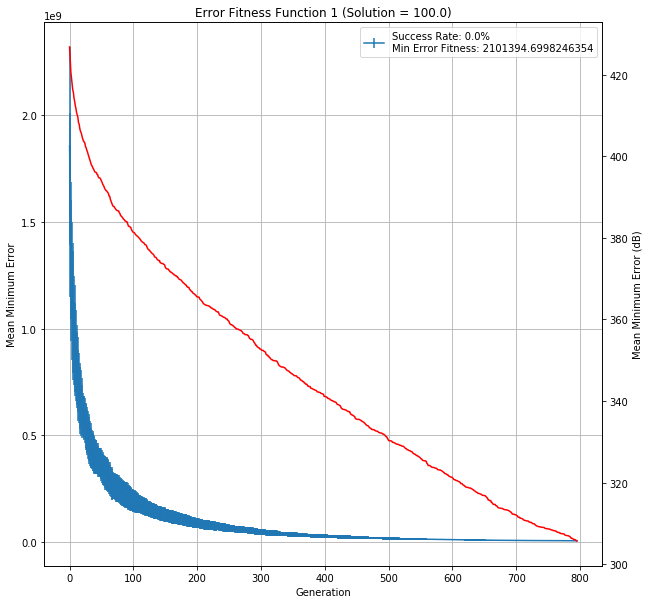

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.8,4.646037e+06,5.275257e+06,6.691630e+06,2.720500e+06,3.077421e+06,5.374906e+06,...,3.238834e+06,3.988644e+06,3.515951e+06,3.449216e+06,4.750603e+06,3.322225e+06,5.287169e+06,4.334056e+06,10:57:14,239400
